This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data

#Dataset Information

Information about customers consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was supplied by the Dutch data mining company Sentient Machine Research and is based on a real world business problem. The training set contains over 5000 descriptions of customers, including the information of **whether or not they have a caravan insurance policy**. A test set contains 4000 customers of whom only the organisers know if they have a caravan insurance policy.

The data dictionary (http://kdd.ics.uci.edu/databases/tic/dictionary.txt) describes the variables used and their values.

Note: All the variables starting with M are zipcode variables. They give information on the distribution of that variable, e.g. Rented house, in the zipcode area of the customer.

One instance per line with tab delimited fields.

TICDATA2000.txt: Dataset to train and validate prediction models and build a description (5822 customer records). Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) and product ownership (attributes 44-86).The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Attribute 86, **"CARAVAN:Number of mobile home policies", is the target variable**.



In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
insurance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLOps/Tarea Fase 1/insurance_company_modified.csv', header=None)
insurance.head(20)

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45,mixed_type_col
1,37.0,1.0,2.0,2.0,8.0,1.0,4.0,?,4.0,6.0,...,0.0,0.0,1.0,invalid,0.0,0.0,0.0,0.0,0.0,108
2,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
3,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,904
4,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bad
5,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271
6,39.0,2.0,3.0,2.0,9.0,2.0,2.0,0.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,945
7,33.0,1.0,2.0,3.0,8.0,0.0,7.0,0.0,2.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,invalid,0.0,NaN
8,33.0,1.0,2.0,4.0,8.0,0.0,1.0,3.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,11.0,2.0,3.0,3.0,3.0,3.0,5.0,0.0,2.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,399


#Limpieza de Datos

In [39]:
insurance.shape

(5938, 87)

In [40]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5870 non-null   object
 1   1       5865 non-null   object
 2   2       5874 non-null   object
 3   3       5869 non-null   object
 4   4       5878 non-null   object
 5   5       5864 non-null   object
 6   6       5859 non-null   object
 7   7       5875 non-null   object
 8   8       5876 non-null   object
 9   9       5877 non-null   object
 10  10      5872 non-null   object
 11  11      5872 non-null   object
 12  12      5872 non-null   object
 13  13      5853 non-null   object
 14  14      5878 non-null   object
 15  15      5867 non-null   object
 16  16      5875 non-null   object
 17  17      5875 non-null   object
 18  18      5856 non-null   object
 19  19      5871 non-null   object
 20  20      5860 non-null   object
 21  21      5853 non-null   object
 22  22      5886 non-null   

In [41]:
insurance.describe(include='all').T

,count,unique,top,freq
0,5870,155,33.0,768
1,5865,82,1.0,4953
2,5874,76,3.0,2513
3,5869,86,3.0,2806
4,5878,80,8.0,1478
...,...,...,...,...
82,5890,43,0.0,5415
83,5877,41,0.0,5523
84,5876,40,0.0,5444
85,5859,32,0.0,5173


In [42]:
''' A partir de la visualización parcial del archivo CSV, se observa que la mayoría de los datos son de tipo numérico entero.
    Por ello, se procede a modificar el tipo de dato del DataFrame para asegurar una correcta manipulación y análisis, dejando
    como valores nulos aquellos que no sean de tipo númerico y/o vacíos.'''

for col in insurance.columns:
    if insurance[col].dtype == 'object':
        insurance[col] = pd.to_numeric(insurance[col], errors='coerce')
        insurance[col] = insurance[col].round().astype('Int64')

insurance.fillna(value=np.nan, inplace=True)

In [43]:
nulos_pre = insurance.isnull().mean()*100
display(nulos_pre.sort_values(ascending=False))

,0
86,29.235433
58,1.886157
73,1.886157
85,1.835635
13,1.818794
...,...
22,1.178848
76,1.162007
81,1.145167
31,1.128326


In [44]:
'''Con base en la descripción de las variables, se confirma que el conjunto de datos contiene únicamente 86 variables,
  incluyendo la variable objetivo. Durante el análisis de valores nulos, se detectó que la última columna presentaba
  más del 29% de datos no numéricos y, además, no formaba parte del conjunto de variables contempladas originalmente.
  Por lo tanto, se decidió eliminar dicha columna para mantener la coherencia del análisis.'''
insurance.drop(columns=[86], inplace=True)

In [45]:
insurance

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,<NA>,4,6,...,0,0,0,1,<NA>,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,<NA>,1,2,2,5,0,4,2,4,0,...,0,0,0,1,0,0,0,0,0,0
5934,41,449,3,3,10,0,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
5935,2,1,2,3,1,1,5,1,3,5,...,0,0,0,1,0,0,0,0,0,0
5936,8,1,2,4,2,0,4,0,5,7,...,0,0,0,1,0,0,0,0,0,1


#EDA

In [46]:
'''Análisis de valores nulos'''
nulos = insurance.isnull().mean()*100
display(nulos.sort_values(ascending=False))

,0
58,1.886157
73,1.886157
85,1.835635
13,1.818794
21,1.785113
...,...
22,1.178848
76,1.162007
81,1.145167
31,1.128326


In [47]:
porcentaje_nulos_por_fila = insurance.isnull().mean(axis=1)*100
porcentajes_filtrados = porcentaje_nulos_por_fila [porcentaje_nulos_por_fila >= 5]
orden_porcentaje_nulos = porcentajes_filtrados.sort_values(ascending=False)
print(len(orden_porcentaje_nulos))
orden_porcentaje_nulos

58


,0
5473,8.139535
5658,8.139535
912,6.976744
2670,6.976744
5846,6.976744
4434,6.976744
2392,6.976744
2257,6.976744
648,6.976744
704,6.976744


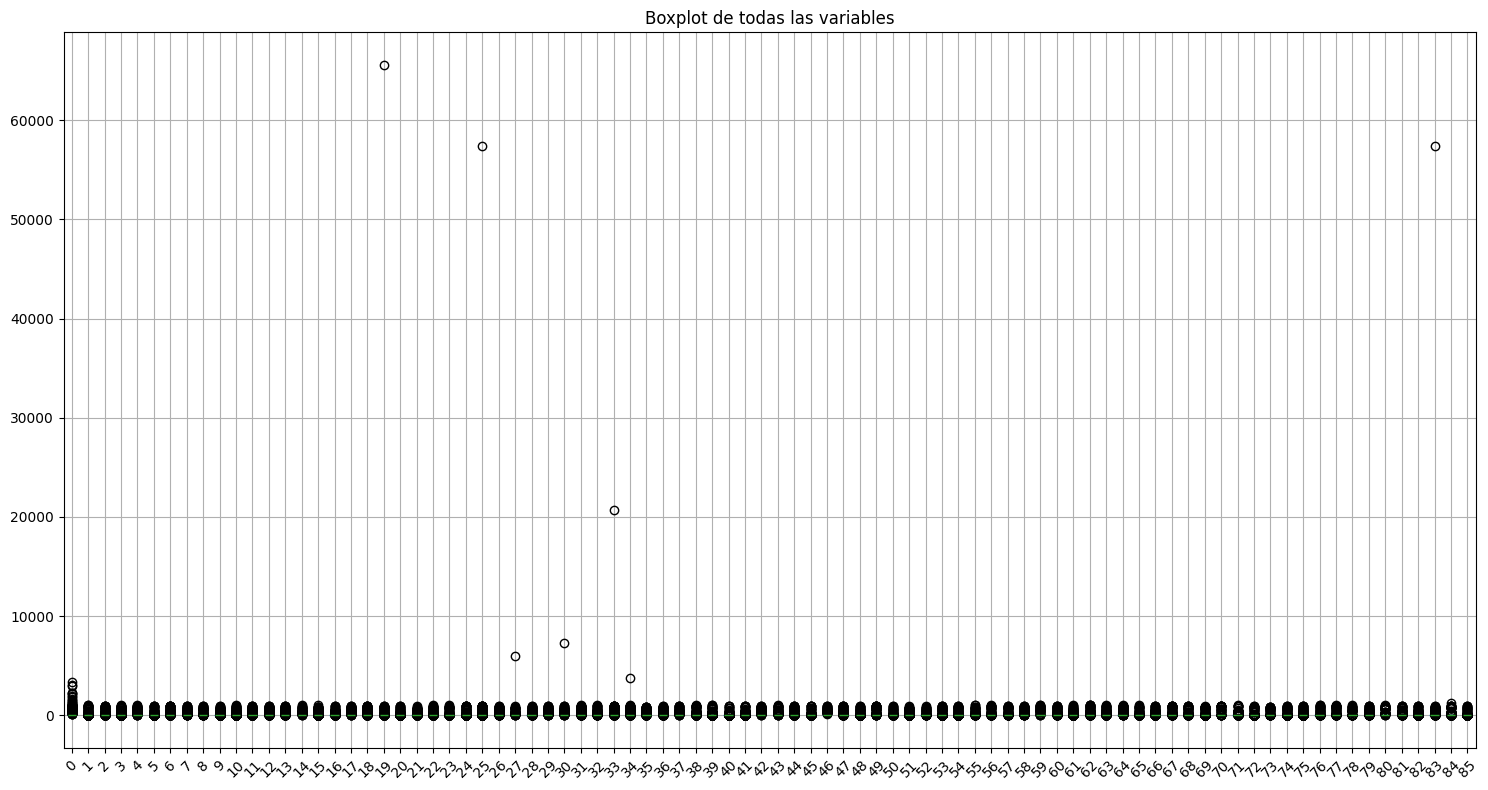

In [48]:
'''Análisis de Outliers'''

plt.figure(figsize=(15, 8))
insurance.boxplot()
plt.title('Boxplot de todas las variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

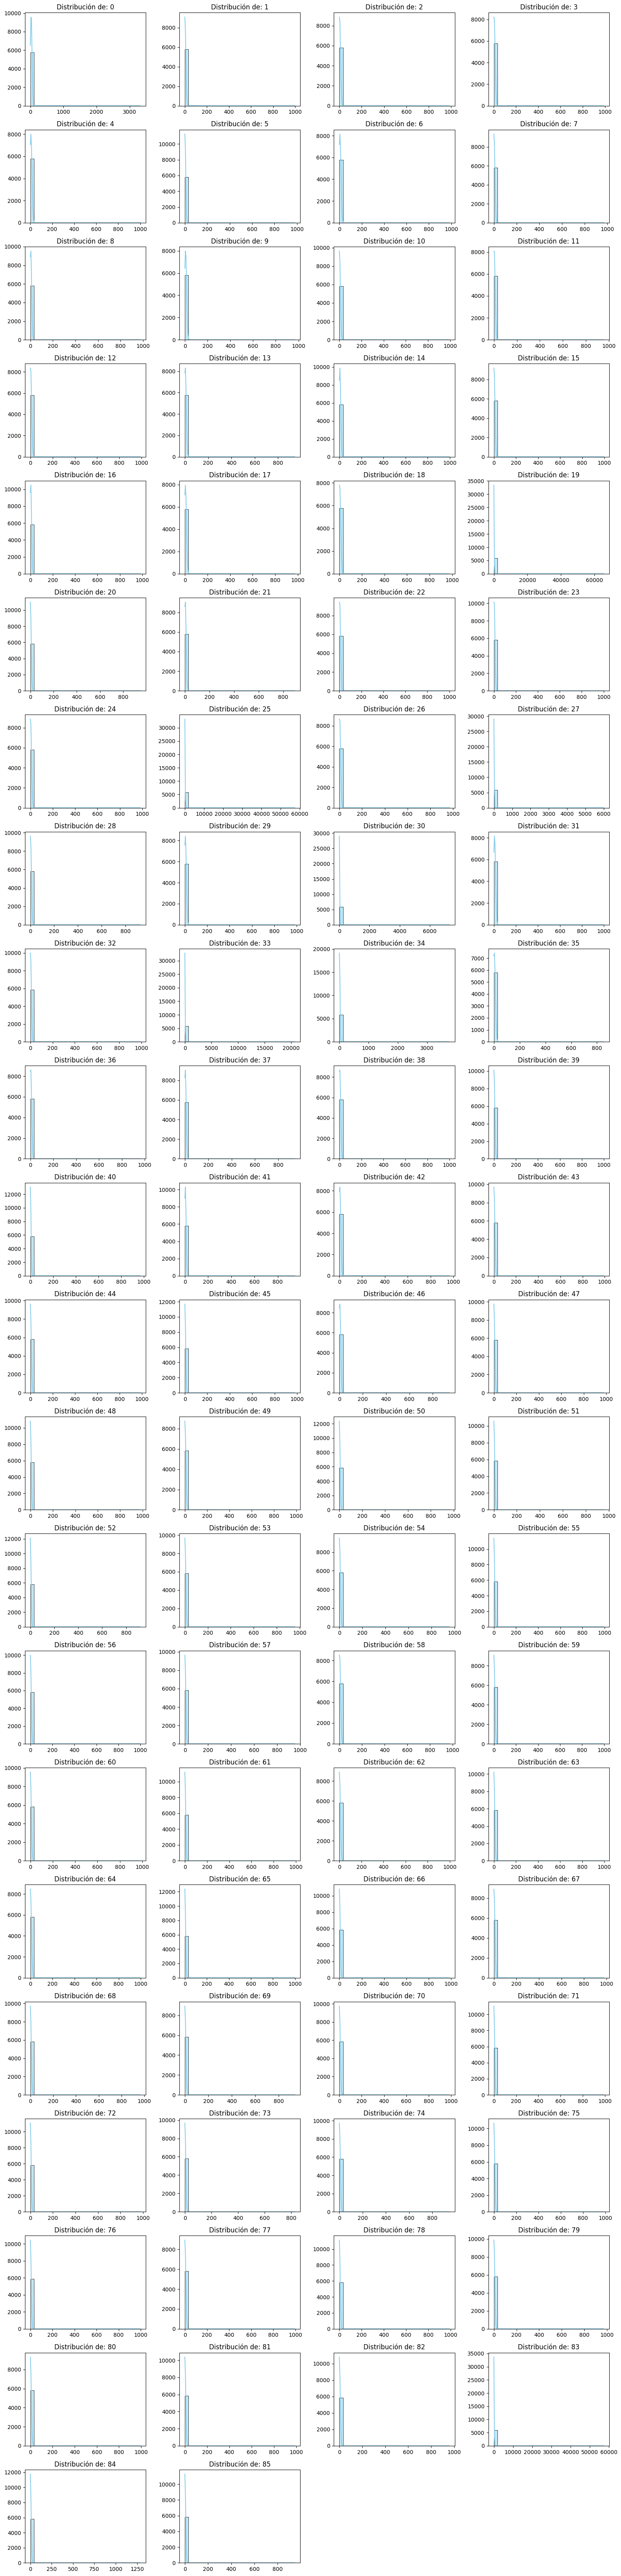

In [49]:
'''Análisis de la distribución de las variables'''
cols_per_row = 4
total_cols = len(insurance.columns)
rows = (total_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(insurance.columns):
    sns.histplot(insurance[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si hay más espacios que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [50]:
skew_values = insurance.skew()
filtered_skew = skew_values[(skew_values > 1) | (skew_values < -1)]
sorted_skew = filtered_skew.sort_values(ascending=False)
sorted_skew

,0
83,76.181437
19,76.112826
25,75.848139
33,72.414267
27,58.135314
...,...
6,13.699164
35,13.583513
17,13.540364
4,13.354987


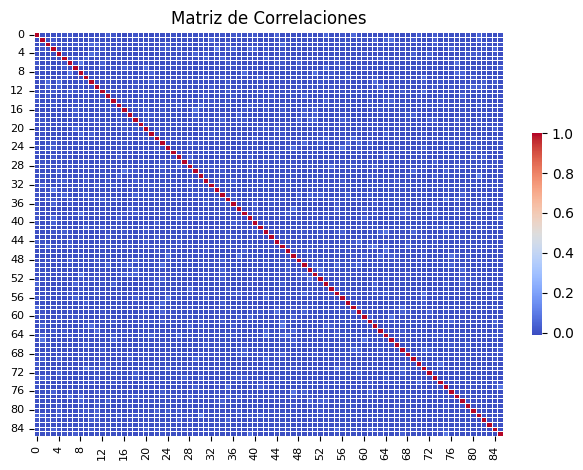

In [51]:
'''Análisis de correlación entre las variables'''
plt.figure()
sns.heatmap(insurance.corr(), annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Matriz de Correlaciones')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

#FEATURE ENGINEERING

In [52]:
'''Eliminación de duplicado'''
insurance.drop_duplicates(inplace=True)

In [53]:
'''Tratamiento de valores nulos'''
porcentaje_nulos_por_fila = insurance.isnull().mean(axis=1)*100

insurance = insurance[porcentaje_nulos_por_fila <= 5]

In [54]:
X = insurance.drop(85, axis=1)
y = insurance[85]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
for col in X_train.columns:
  mediana = X_train[col].median()
  X_train[col] = X_train[col].fillna(X_train[col].median())

y_train = y_train.fillna(y_train.median())

In [56]:
'''Tratamiento de Outliers'''
outliers_por_variable = {}

for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    mediana = X_train[col].median()

    X_train[col] = X_train[col].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

In [57]:
'''Sabemos que y es la variable de salida y únicamente toma valores 0 o 1'''
limite_inferior = 0
limite_superior = 1

y_train = y_train.apply(lambda x: limite_inferior if x < limite_inferior else (limite_superior if x > limite_superior else x))

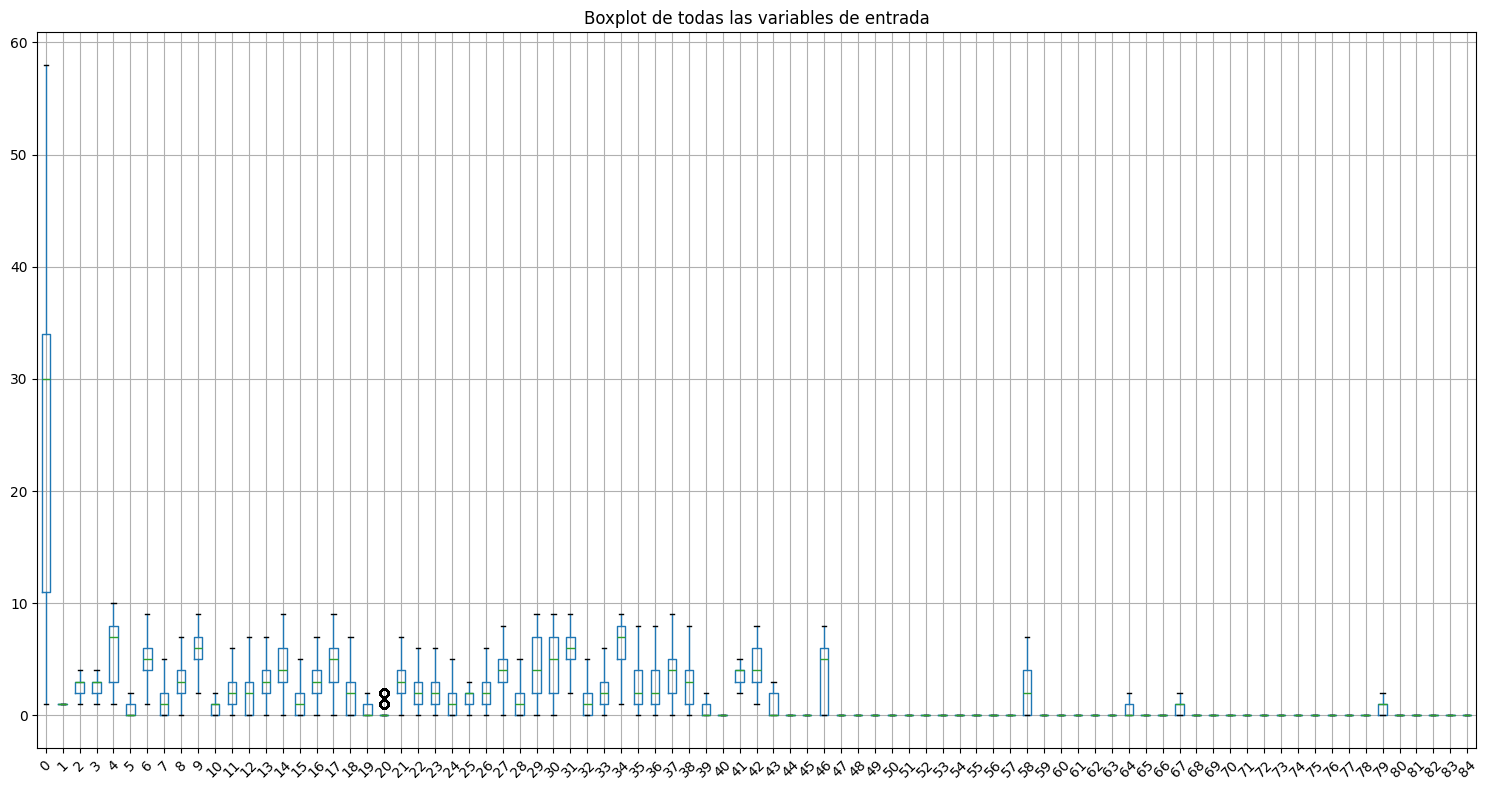

In [58]:
plt.figure(figsize=(15, 8))
X_train.boxplot()
plt.title('Boxplot de todas las variables de entrada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

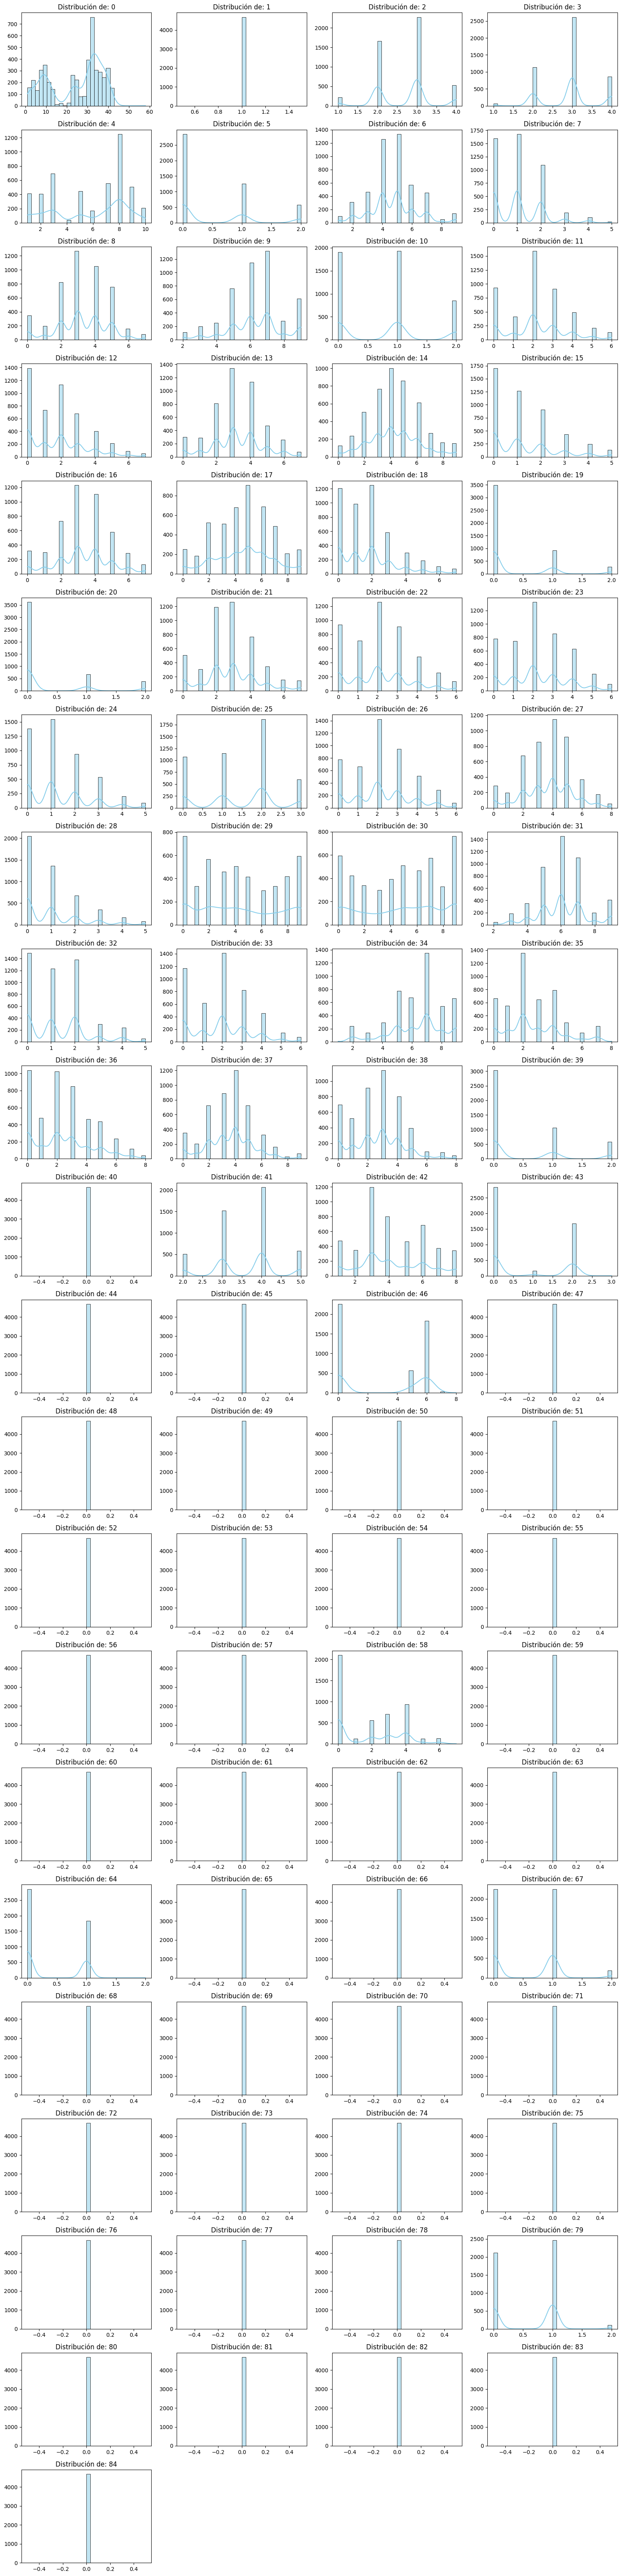

In [59]:
cols_per_row = 4
total_cols = len(X_train.columns)
rows = (total_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si hay más espacios que columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

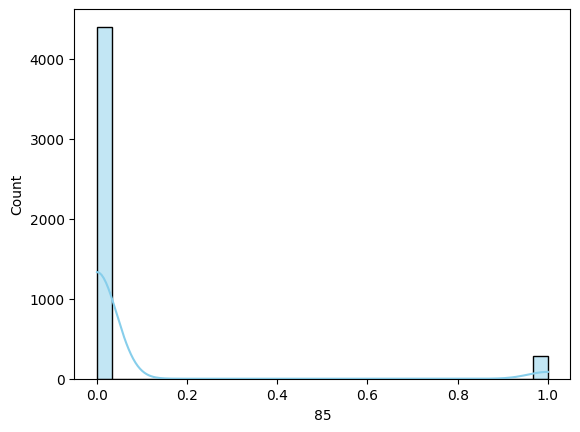

In [60]:
sns.histplot(y_train, kde=True, bins=30, color='skyblue');

In [61]:
skew_values = X_train.skew()
filtered_skew = skew_values[(skew_values > 1) | (skew_values < -1)]
sorted_skew = filtered_skew.sort_values(ascending=False)
sorted_skew

,0
20,1.813250
19,1.673277
28,1.240817
39,1.144085
5,1.003521


In [62]:
y_train.skew()

np.float64(3.6990206474343847)

In [63]:
'''Eliminación de variables correlacionadas'''

correlation_matrix = X_train.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]
print(len(high_corr_columns))

X_train = X_train.drop(columns=high_corr_columns)

5


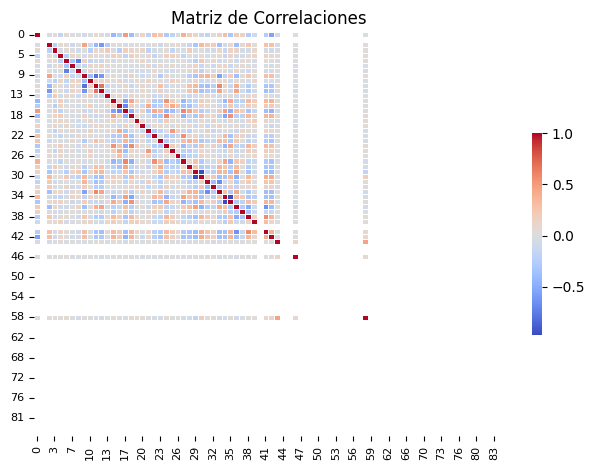

In [64]:
plt.figure()
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Matriz de Correlaciones')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

In [65]:
'''Normalización de variables'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#AJUSTE DEL MODELO

REDUCCION DE VARIABLES (PCA)

REGRESIÓN LOGARÍTMICA